<a href="https://colab.research.google.com/github/Shahid-Ali-Khan-099/Programming-for-AI/blob/main/Lab_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Traditional Machine Learning Implementation**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load the dataset
titanic_data = pd.read_csv('/content/titanic (1).csv')

#print(titanic_data.isnull().sum())
# Handle missing values=
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

#sex = pd.get_dummies(train['Sex'],dtype=int)
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], dtype=int)

# Select features and target variable
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = titanic_data[['Survived']]


# Step 4: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the KNN Model
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = knn.predict(X_test)
#print("Predicted Values:")
#print(y_pred )

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Model Accuracy: 0.7095
Confusion Matrix:
[[87 18]
 [34 40]]


<ipython-input-1-5a55a13cca37>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)
<ipython-input-1-5a55a13cca37>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

# **Sklearn Pipeline Implementation**

In [25]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
data = pd.read_csv('/content/titanic (1).csv')

#print("Original DataFrame:")
#print(data)
#print(data.shape)


def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

# Custom function to create the FamilySize feature
def create_family_size(X):
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  # Adding 1 for the individual themselves
    return X

# Custom function to drop specified columns
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

def drop_extracolumns(X):
    return X.drop (['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Function to create FamilySize and drop SibSp and Parch columns
def family_size(X):
    X = create_family_size(X)
    X = drop_columns(X)
    return X

# Create pipelines for Age
age_pipeline = Pipeline(steps=[
    ('age_imputer', SimpleImputer(strategy='mean')),  # Impute Age
    ('age_scaler', MinMaxScaler())  # Scale Age
])

fare_pipeline = Pipeline(steps=[
    #('fare_imputer', SimpleImputer(strategy='mean')),  # Impute Fare
    ('fare_scaler', MinMaxScaler())  # Scale Fare
])

family_size_pipeline = Pipeline(steps=[
    ('family_size_creator', FunctionTransformer(family_size)),
    ('family_size_scaler', MinMaxScaler()),  # Scale Family_Size
])

embarked_pipeline = Pipeline(steps=[
    ('embarked_imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked
    ('embarked_onehot', OneHotEncoder())  # One-hot encode Embarked
])

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('drop', drop_extracolumns, ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('age_encoder', age_pipeline, ['Age']),
    ('fare_encoder', fare_pipeline, ['Fare']),
    ('family_size', family_size_pipeline, ['SibSp', 'Parch']),  # Process FamilySize
    ('embarked_encoder', embarked_pipeline, ['Embarked']),
    ('sex_encoder', OneHotEncoder(), ['Sex']),
    ('scaler', MinMaxScaler(), ['Pclass']),  # Scale Pclass
], remainder='passthrough')

# Create a complete pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN Classifier
])

X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# imbalanced handling
#X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)



print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))



# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

print(X_train)
print(y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Original dataset shape Counter({0: 549, 1: 342})
Resampled dataset shape Counter({0: 342, 1: 342})


TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '<function drop_extracolumns at 0x793084b9c5e0>' (type <class 'function'>) doesn't.

**Random over sampling**

In [12]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
data = pd.read_csv('/content/titanic (1).csv')

#print("Original DataFrame:")
#print(data)
#print(data.shape)


def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

# Custom function to create the FamilySize feature
def create_family_size(X):
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  # Adding 1 for the individual themselves
    return X

# Custom function to drop specified columns
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

# Function to create FamilySize and drop SibSp and Parch columns
def family_size(X):
    X = create_family_size(X)
    X = drop_columns(X)
    return X

# Create pipelines for Age
age_pipeline = Pipeline(steps=[
    ('age_imputer', SimpleImputer(strategy='mean')),  # Impute Age
    ('age_scaler', MinMaxScaler())  # Scale Age
])

fare_pipeline = Pipeline(steps=[
    #('fare_imputer', SimpleImputer(strategy='mean')),  # Impute Fare
    ('fare_scaler', MinMaxScaler())  # Scale Fare
])

family_size_pipeline = Pipeline(steps=[
    ('family_size_creator', FunctionTransformer(family_size)),
    ('family_size_scaler', MinMaxScaler()),  # Scale Family_Size
])

embarked_pipeline = Pipeline(steps=[
    ('embarked_imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked
    ('embarked_onehot', OneHotEncoder())  # One-hot encode Embarked
])

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('age_encoder', age_pipeline, ['Age']),
    ('fare_encoder', fare_pipeline, ['Fare']),
    ('family_size', family_size_pipeline, ['SibSp', 'Parch']),  # Process FamilySize
    ('embarked_encoder', embarked_pipeline, ['Embarked']),
    ('sex_encoder', OneHotEncoder(), ['Sex']),
    ('scaler', MinMaxScaler(), ['Pclass']),  # Scale Pclass
], remainder='passthrough')

# Create a complete pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN Classifier
])

X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# imbalanced handling
print('Original dataset shape %s' % Counter(y))
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resampled))





# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Original dataset shape Counter({0: 549, 1: 342})
Resampled dataset shape Counter({0: 549, 1: 549})

Model Accuracy: 0.80
Confusion Matrix:
[[90 15]
 [21 53]]


**SMOTE**

In [17]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

# Load the dataset
data = pd.read_csv('/content/titanic (1).csv')

#print("Original DataFrame:")
#print(data)
#print(data.shape)


def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

# Custom function to create the FamilySize feature
def create_family_size(X):
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  # Adding 1 for the individual themselves
    return X

# Custom function to drop specified columns
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

# Function to create FamilySize and drop SibSp and Parch columns
def family_size(X):
    X = create_family_size(X)
    X = drop_columns(X)
    return X

# Create pipelines for Age
age_pipeline = Pipeline(steps=[
    ('age_imputer', SimpleImputer(strategy='mean')),  # Impute Age
    ('age_scaler', MinMaxScaler())  # Scale Age
])

fare_pipeline = Pipeline(steps=[
    #('fare_imputer', SimpleImputer(strategy='mean')),  # Impute Fare
    ('fare_scaler', MinMaxScaler())  # Scale Fare
])

family_size_pipeline = Pipeline(steps=[
    ('family_size_creator', FunctionTransformer(family_size)),
    ('family_size_scaler', MinMaxScaler()),  # Scale Family_Size
])

embarked_pipeline = Pipeline(steps=[
    ('embarked_imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked
    ('embarked_onehot', OneHotEncoder())  # One-hot encode Embarked
])

# Create a ColumnTransformer to preprocess the data
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('age_encoder', age_pipeline, ['Age']),
    ('fare_encoder', fare_pipeline, ['Fare']),
    ('family_size', family_size_pipeline, ['SibSp', 'Parch']),  # Process FamilySize
    ('embarked_encoder', embarked_pipeline, ['Embarked']),
    ('sex_encoder', OneHotEncoder(), ['Sex']),
    ('scaler', MinMaxScaler(), ['Pclass']),  # Scale Pclass
], remainder='passthrough')

# Create a complete pipeline that includes preprocessing and the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing steps
    ('classifier', KNeighborsClassifier(n_neighbors=5))  # KNN Classifier
])

X = data.drop('Survived', axis=1)
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)
# imbalanced handling
print(X_train)

X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print('SMOTE Resampled dataset shape %s' % Counter(y_resampled))





# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

# Step 8: Evaluate the Model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


     PassengerId  Pclass                                Name     Sex   Age  \
331          332       1                 Partner, Mr. Austen    male  45.5   
733          734       2          Berriman, Mr. William John    male  23.0   
382          383       3                  Tikkanen, Mr. Juho    male  32.0   
704          705       3             Hansen, Mr. Henrik Juul    male  26.0   
813          814       3  Andersson, Miss. Ebba Iris Alfrida  female   6.0   
..           ...     ...                                 ...     ...   ...   
106          107       3    Salkjelsvik, Miss. Anna Kristine  female  21.0   
270          271       1               Cairns, Mr. Alexander    male   NaN   
860          861       3             Hansen, Mr. Claus Peter    male  41.0   
435          436       1           Carter, Miss. Lucile Polk  female  14.0   
102          103       1           White, Mr. Richard Frasar    male  21.0   

     SibSp  Parch             Ticket      Fare    Cabin Embarke

ValueError: could not convert string to float: 'Partner, Mr. Austen'

# **Random UnderSampling**

In [4]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 100, 1: 100})


# **Random OverSampling**

In [5]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=[0.01, 0.05, 0.94], class_sep=0.8, random_state=0)
print('Original dataset shape %s' % Counter(y))
#print(X)
#print(y)


ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


print('Resampled dataset shape %s' % Counter(y_resampled))
#print(X_resampled)
#print(y_resampled)
#print(sorted(Counter(y_resampled).items()))

Original dataset shape Counter({2: 94, 1: 5, 0: 1})
Resampled dataset shape Counter({2: 94, 1: 94, 0: 94})


# **SMOTE OverSampling**

In [6]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1, weights=[0.01, 0.05, 0.94], class_sep=0.8, random_state=0)
print('Original dataset shape %s' % Counter(y))


X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print('SMOTE Resampled dataset shape %s' % Counter(y_resampled))


#print(sorted(Counter(y_resampled).items()))

#X_resampled_adasyn, y_resampled_adasyn = ADASYN().fit_resample(X, y)
#print('ADASYN Resampled dataset shape %s' % Counter(y_resampled_adasyn))
#print(sorted(Counter(y_resampled).items()))


Original dataset shape Counter({2: 4674, 1: 262, 0: 64})
SMOTE Resampled dataset shape Counter({2: 4674, 1: 4674, 0: 4674})


In [26]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
data = pd.read_csv('/content/titanic (1).csv')

# Function to impute Embarked column
def impute_embarked(X):
    X['Embarked'] = X['Embarked'].fillna(X['Embarked'].mode()[0])  # Fill missing values
    return X

# Function to create FamilySize feature
def create_family_size(X):
    X['FamilySize'] = X['SibSp'] + X['Parch'] + 1  # Adding 1 for the individual themselves
    return X

# Function to drop SibSp and Parch after creating FamilySize
def drop_columns(X):
    return X.drop(['SibSp', 'Parch'], axis=1)

def family_size(X):
    X = create_family_size(X)
    X = drop_columns(X)
    return X

# Preprocessing pipelines
age_pipeline = Pipeline(steps=[
    ('age_imputer', SimpleImputer(strategy='mean')),  # Impute Age
    ('age_scaler', MinMaxScaler())  # Scale Age
])

fare_pipeline = Pipeline(steps=[
    ('fare_scaler', MinMaxScaler())  # Scale Fare
])

family_size_pipeline = Pipeline(steps=[
    ('family_size_creator', FunctionTransformer(family_size)),
    ('family_size_scaler', MinMaxScaler()),  # Scale FamilySize
])

embarked_pipeline = Pipeline(steps=[
    ('embarked_imputer', FunctionTransformer(impute_embarked)),  # Impute Embarked
    ('embarked_onehot', OneHotEncoder())  # One-hot encode Embarked
])

# ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('drop', 'drop', ['PassengerId', 'Name', 'Ticket', 'Cabin']),
    ('age_encoder', age_pipeline, ['Age']),
    ('fare_encoder', fare_pipeline, ['Fare']),
    ('family_size', family_size_pipeline, ['SibSp', 'Parch']),
    ('embarked_encoder', embarked_pipeline, ['Embarked']),
    ('sex_encoder', OneHotEncoder(), ['Sex']),
    ('scaler', MinMaxScaler(), ['Pclass']),
], remainder='passthrough')

# Prepare features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Apply preprocessing on the entire dataset before resampling
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed)

# Check original class distribution
print(f"Original class distribution: {Counter(y)}")

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

# Check resampled class distribution
print(f"SMOTE Resampled class distribution: {Counter(y_resampled)}")

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a pipeline for the model
pipeline = Pipeline(steps=[
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# Fit the model on the resampled training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Original class distribution: Counter({0: 549, 1: 342})
SMOTE Resampled class distribution: Counter({0: 549, 1: 549})

Model Accuracy: 0.80
Confusion Matrix:
[[ 74  29]
 [ 16 101]]


# Lab Tasks

Perform following operations on the Titanic Dataset:

*   Apply Random Undersampling to balance the dataset. (https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
*   Apply Random Oversampling and SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset. (https://imbalanced-learn.org/stable/over_sampling.html)
*   Remove Outliers from the dataset.

*   Apply k-fold cross validation on the dataset and display fold wise results.

Perform the steps mentioned above on the following dataset

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [5]:
print(X.head(2))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  


In [7]:
print(y.head(2))

   num
0    0
1    2


**4. Implementation**


***4.1 Data Preprocessing***

In [15]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets
df = heart_disease.data.original

In [26]:
import pandas as pd
df = pd.read_csv("cardio_train.csv" , sep=";")

In [27]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


**Checking Outliers**

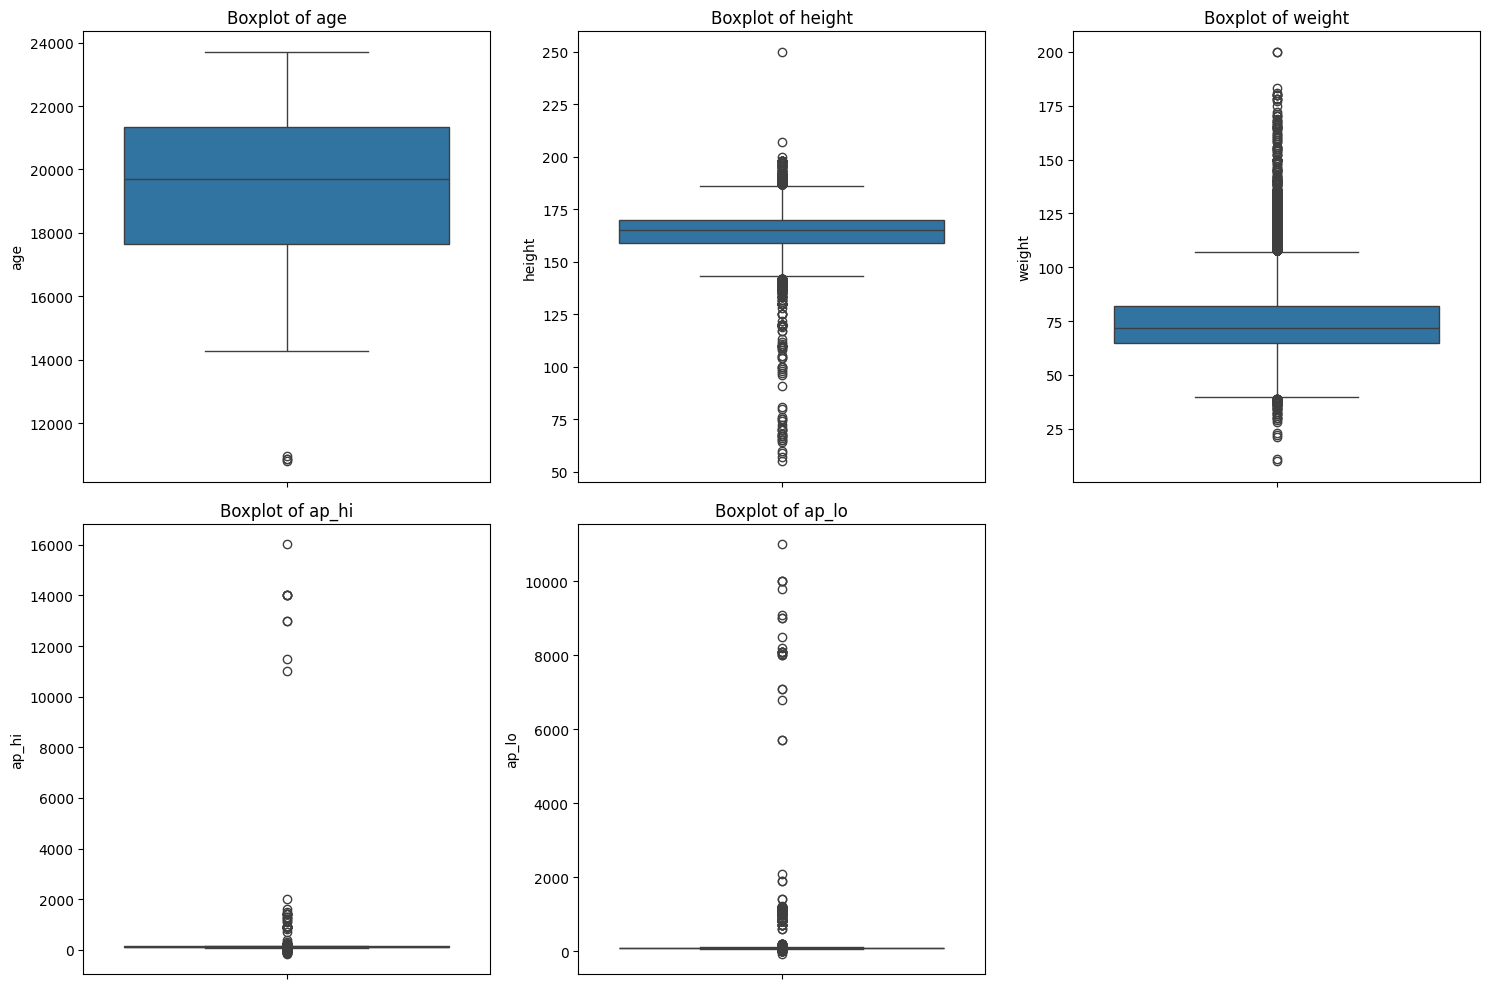

In [28]:



import matplotlib.pyplot as plt
import seaborn as sns # Import the seaborn library

# Visualize outliers using boxplots for continuous variables
# Define continuous variables
continuous_vars = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Plotting boxplots for continuous variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
  plt.subplot(2, 3, i)
  sns.boxplot(y=df[col]) # Now sns is defined and can be used
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**4.2 Model Training**

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

**Load The Dataset**

In [30]:
df = pd.read_csv("cardio_train.csv" , sep=";")

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Exploratory Data Analysis (EDA)**

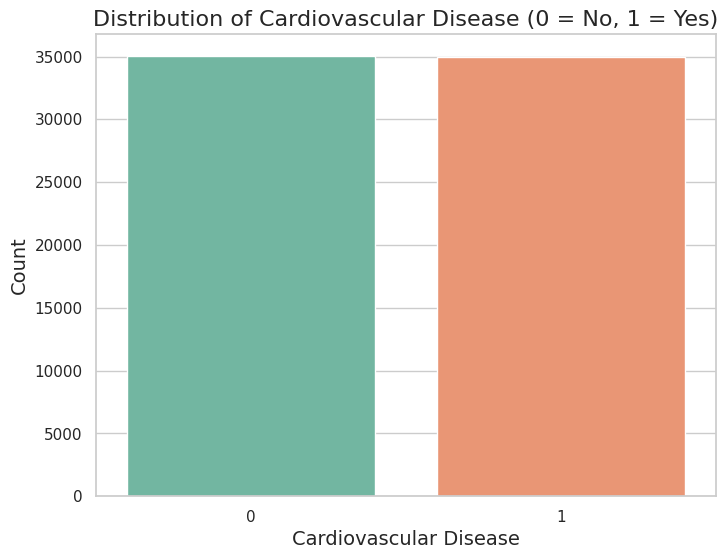

In [31]:
# Set style for seaborn
sns.set(style="whitegrid")
# 1. Distribution of Target Variable (Cardiovascular Disease)
plt.figure(figsize=(8, 6))
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Distribution of Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=16)
plt.xlabel('Cardiovascular Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

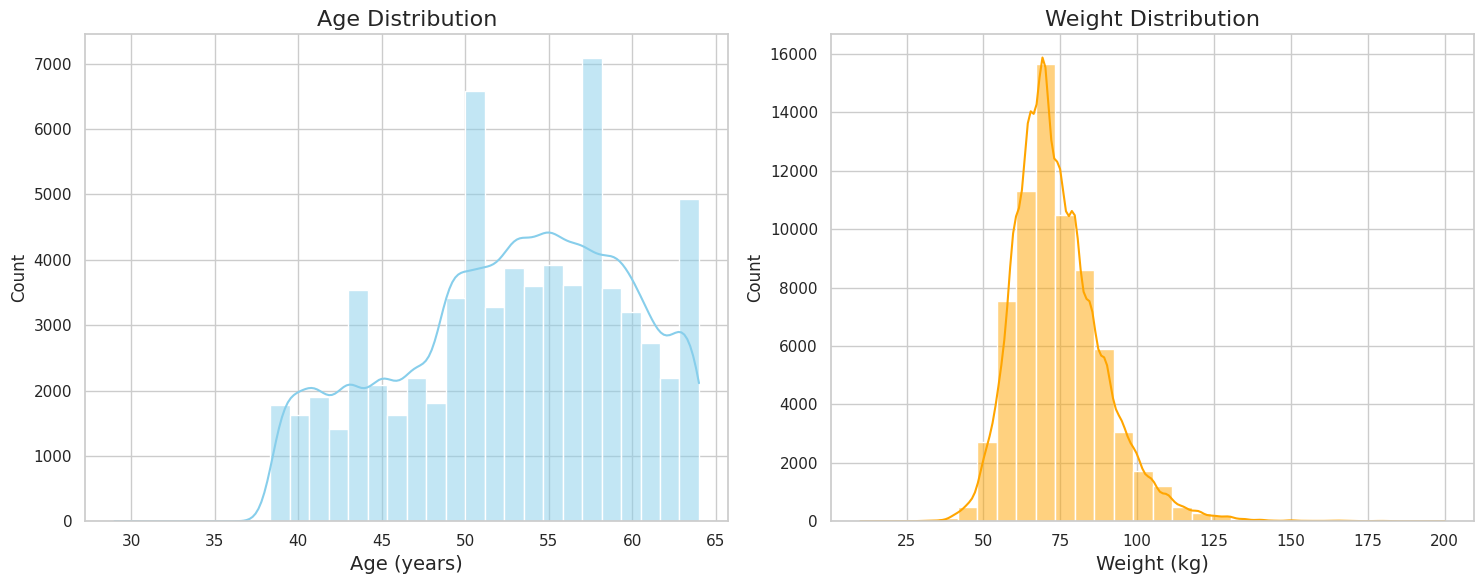

In [32]:
# 2. Visualizing Continuous Variables
# Age Distribution (assuming age is in days, we will convert it to years)
df['age_years'] = (df['age'] / 365).astype(int)
plt.figure(figsize=(15, 6))
# Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['age_years'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
# Weight Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['weight'], kde=True, bins=30, color='orange')
plt.title('Weight Distribution', fontsize=16)
plt.xlabel('Weight (kg)', fontsize=14)
plt.tight_layout()
plt.show()

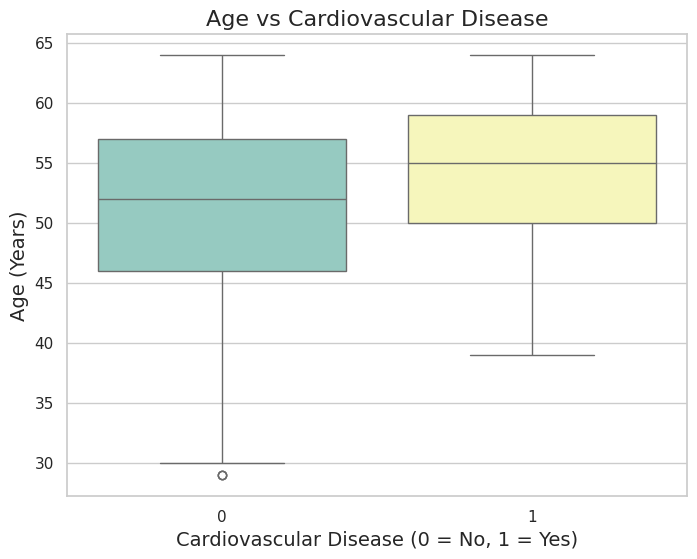

In [34]:
#3. Relationship between Continuous Variables and Cardiovascular Disease
# Age vs. Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='age_years', data=df, palette='Set3')
plt.title('Age vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Age (Years)', fontsize=14)
plt.show()

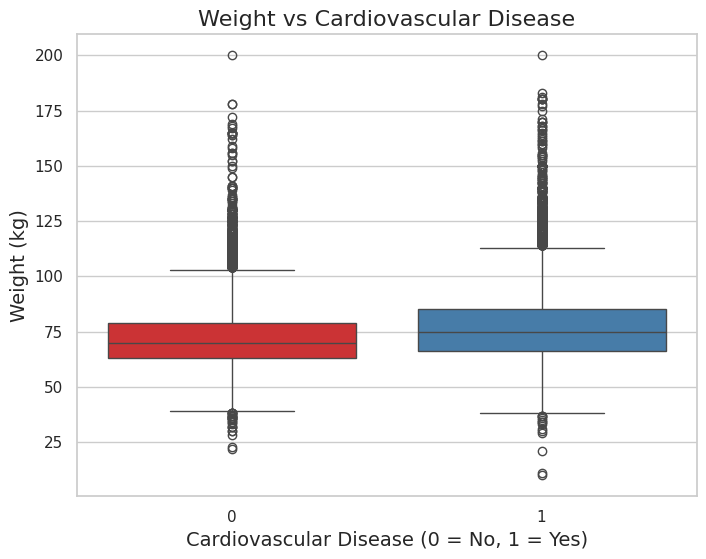

In [35]:
# Weight vs. Cardiovascular Disease
plt.figure(figsize=(8, 6))
sns.boxplot(x='cardio', y='weight', data=df, palette='Set1')
plt.title('Weight vs Cardiovascular Disease', fontsize=16)
plt.xlabel('Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Weight (kg)', fontsize=14)
plt.show()

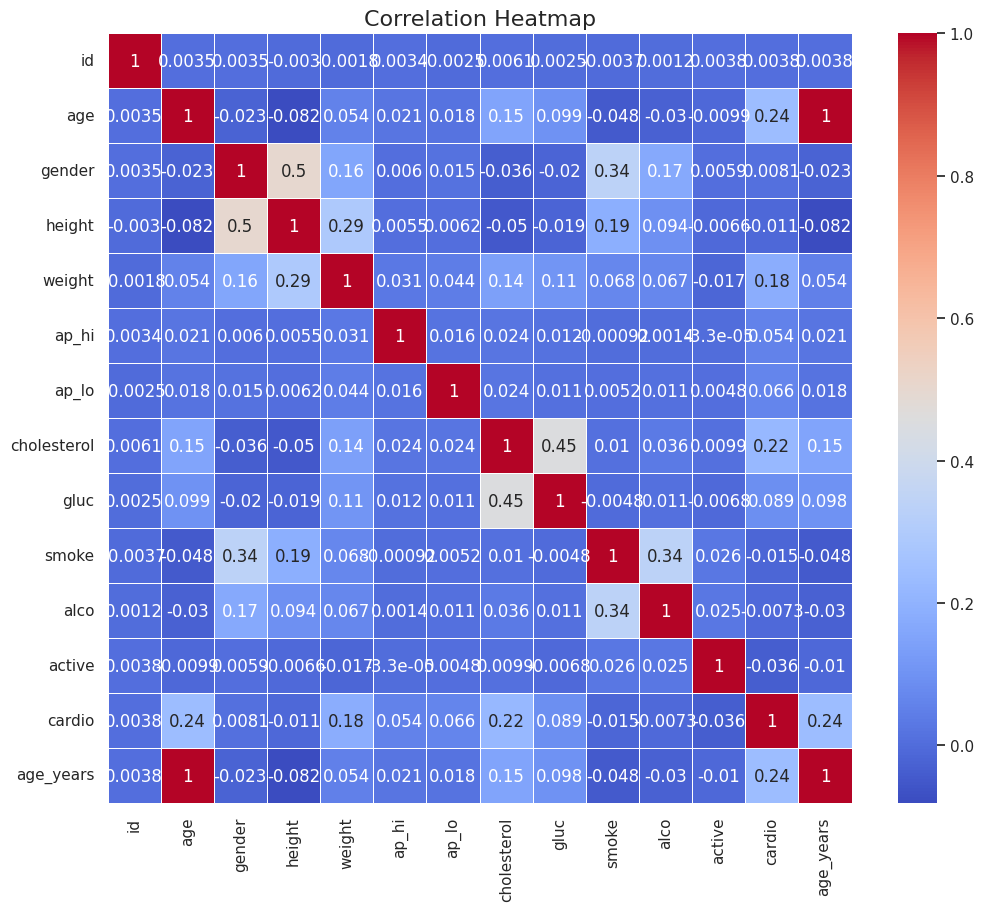

In [36]:
# 5. Correlation Heatmap for All Variables
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

**4.2.1 Logistic Regression**

In [39]:
# 4. Model Training and Evaluation
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

NameError: name 'X_train_scaled' is not defined

In [41]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Assuming 'df' is your DataFrame containing the data
# and 'target_variable_column' is the name of the column containing your target variable

# 1. Split data into training and testing sets
X = df.drop('cardio', axis=1)  # Replace 'target_variable_column' with the actual column name
y = df['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# 2. Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Training and Evaluation
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

**4.2.2 Random Forest**

In [42]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [43]:
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}\n")

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Accuracy: 0.7268
ROC-AUC: 0.7873



**4.2.3 Support Vector Classifier**

In [ ]:
# Support Vector Classifier (SVM with probability enabled)
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)[:, 1]

In [ ]:
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svc):.4f}\n")

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv("/content/cardio_train.csv", sep=";")

# Display dataset overview
print("Dataset Overview:")
print(df.head())
print(f"Shape: {df.shape}")

# Data Preprocessing
print("\n--- Data Preprocessing ---")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

# Visualizing outliers using boxplots
continuous_vars = ['age_years', 'height', 'weight', 'ap_hi', 'ap_lo']
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Outlier handling (example: cap extreme blood pressure values)
df['ap_hi'] = np.clip(df['ap_hi'], 90, 200)
df['ap_lo'] = np.clip(df['ap_lo'], 60, 120)

# Target variable: cardio (1 = heart disease, 0 = no heart disease)
sns.countplot(x='cardio', data=df, palette='Set2')
plt.title('Distribution of Cardiovascular Disease (0 = No, 1 = Yes)', fontsize=16)
plt.xlabel('Cardiovascular Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Features and target variable
X = df.drop(columns=['cardio', 'id', 'age', 'age_years'])
y = df['cardio']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Standardize continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation
print("\n--- Model Training and Evaluation ---")

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]
print("\nLogistic Regression:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")

# Support Vector Machine
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_prob_svc = svc.predict_proba(X_test_scaled)[:, 1]
print("\nSupport Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svc):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_svc):.4f}")

# Compare model performance
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracy = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svc)]
roc_auc = [roc_auc_score(y_test, y_prob_lr), roc_auc_score(y_test, y_prob_rf), roc_auc_score(y_test, y_prob_svc)]

performance_df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'ROC-AUC': roc_auc})
print("\nModel Performance Comparison:")
print(performance_df)

# Visualize performance
performance_df.set_index('Model').plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title('Model Performance Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xticks(rotation=0)
plt.show()
